# TALLER BÁSICO DE MANIPULACIÓN DE SEÑALES BIOMÉDICAS

## Bioseñales

Los canales o sensores son los medios que permiten capturar el fenómeno físico, en este caso, la aparición de un voltaje

![eeg-2680957_960_720.jpg](eeg-2680957_960_720.jpg)
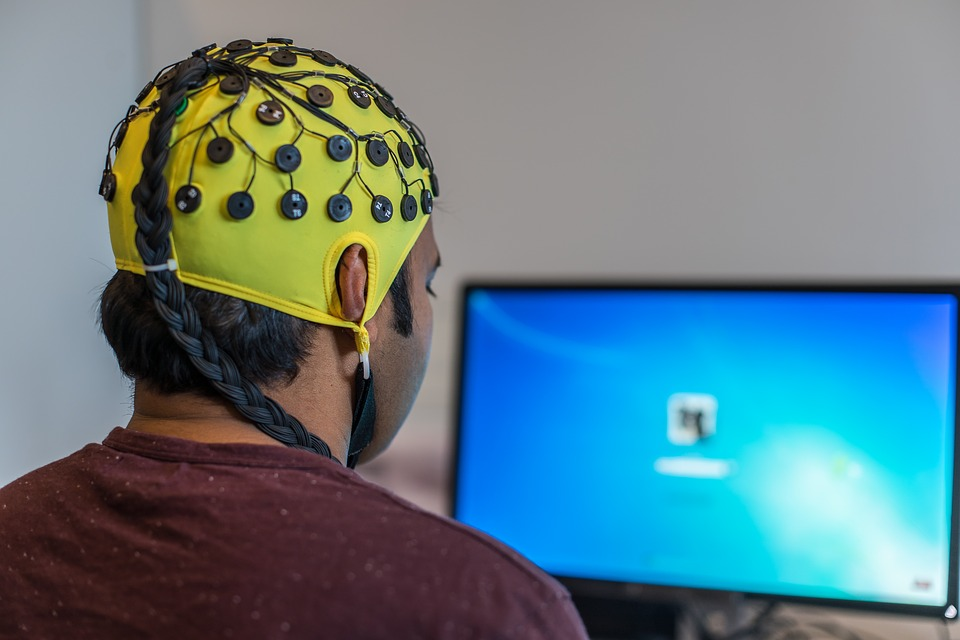

## Librerías básicas

Describir cada una de las librerías para que sirven, qué las caracteriza y consultar sobre las adicionales

import numpy as np;
import matplotlib.pyplot as plt;

from csv import reader as reader_csv;

import scipy.signal as signal;
import scipy.io as sio;

## Carga de archivos .mat

In [3]:
mat_contents = sio.whosmat('control/C001R_EP_reposo.mat') #loading data
print("the loaded keys are: " + str(mat_contents.keys())); #the data is loaded as a Python dictionary

NameError: name 'sio' is not defined

In [36]:
#in the current case the signal is stored in the data field
data = mat_contents['data'];

### Atributos básicos

In [37]:
print("Variable python: " + str(type(data)));
print("Tipo de variable cargada: " + str(data.dtype));
print("Dimensiones de los datos cargados: " + str(data.shape));
print("Numero de dimensiones: " + str(data.ndim));
print("Tamanio: " + str(data.size));
print("Tamanio en memoria (bytes): " + str(data.nbytes));

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 180)
Numero de dimensiones: 3
Tamanio: 2880000
Tamanio en memoria (bytes): 23040000


Cómo se podría convertir la señal a continua?

Cómo se podría verificar que la señal ha quedado bien convertida?

## Gráficación básica

Resolver punto en la diapositiva 8

Graficar la distribución o histograma de los puntos

Resolver los mismos puntos usando la interfaz de objetos de matplotlib

## Manipulación de señales

La señal P300 es una señal que se obtiene cuando una persona tiene que discriminar un estímulo infrecuente entre muchos frecuentes y que se registra en el EEG como un aumento en el voltaje en las condiciones infrecuentes respecto a las frecuentes alrededor de 300 ms luego de la presentación del estímulo.

La presencia, magnitud, topografía y duración de esta señal se utiliza a veces en la medición de la función cognitiva de los procesos de toma de decisiones.

![Plot-of-the-visual-P300-at-Cz-averaged-across-all-subjects.png](Plot-of-the-visual-P300-at-Cz-averaged-across-all-subjects.png)
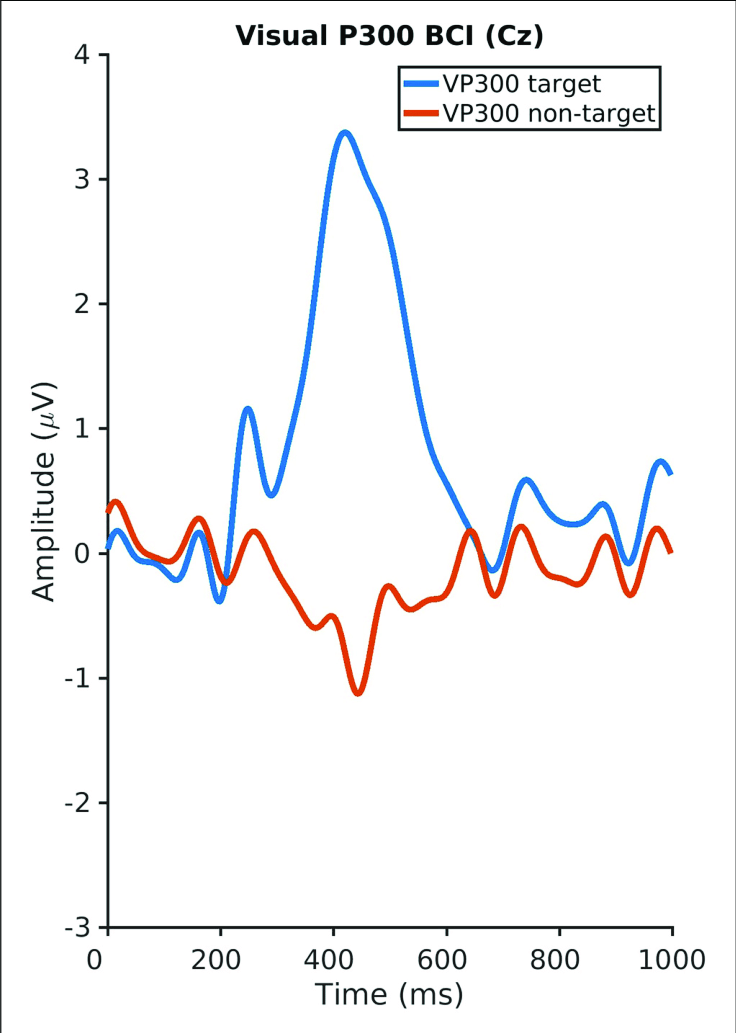

In [38]:
#loading data
mat_contents = sio.loadmat('senales_potencial.mat')
#the data is loaded as a Python dictionary
print("the loaded keys are: " + str(mat_contents.keys()));
#in the current case the signal is stored in the data field
condicion_frecuente = mat_contents['frecuente'];
condicion_infrecuente = mat_contents['infrecuente'];

the loaded keys are: dict_keys(['__header__', '__version__', '__globals__', 'frecuente', 'infrecuente'])


In [44]:
print("Dimensiones de los datos cargados frecuente: " + str(condicion_frecuente.shape));
print("Dimensiones de los datos cargados infreceunte: " + str(condicion_infrecuente.shape));

canalesf = condicion_frecuente.shape[0]
muestrasf = condicion_frecuente.shape[1]
epocasf = condicion_frecuente.shape[2]
canalesif = condicion_infrecuente.shape[0]
muestrasif = condicion_infrecuente.shape[1]
epocasif = condicion_infrecuente.shape[2]

print(canalesf)
print(canalesif)


Dimensiones de los datos cargados frecuente: (58, 1150, 130)
Dimensiones de los datos cargados infreceunte: (58, 1150, 20)
58
58


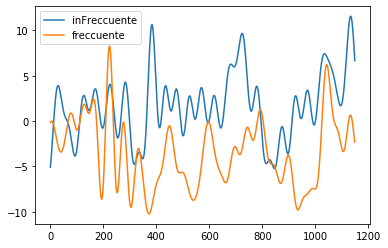

In [57]:
plt.plot(condicion_infrecuente[56,:,3],label= "inFreccuente")
plt.plot(condicion_frecuente[56,:,3],label= "freccuente")
plt.legend()
plt.show()

## Visualización del potencial

In [54]:
promedio_frecuentes = np.mean(condicion_frecuente,2)
promedio_infrecuentes = np.mean(condicion_infrecuente,2)
print(promedio_frecuentes.shape)
print(promedio_infrecuentes.shape)

(58, 1150)
(58, 1150)


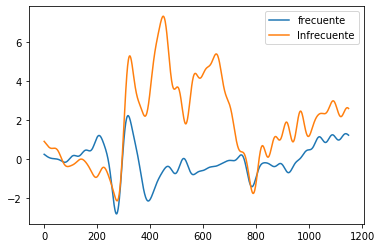

In [61]:
plt.plot(promedio_frecuentes[5,:],label= "frecuente")
plt.plot(promedio_infrecuentes[5,:],label= "Infrecuente")
plt.legend()
plt.show()

## Estadística básica

In [63]:
promedio_frecuentes = np.mean(condicion_frecuente,1)
promedio_infrecuentes = np.mean(condicion_infrecuente,1)
print(promedio_frecuentes.shape)
print(promedio_infrecuentes.shape)

(58, 130)
(58, 20)


In [64]:
promedio_frecuentes = np.mean(promedio_frecuentes,1)
promedio_infrecuentes = np.mean(promedio_infrecuentes,1)
print(promedio_frecuentes.shape)

(58,)


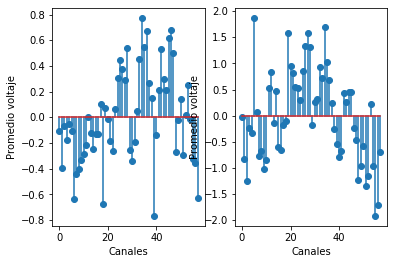

In [65]:
plt.subplot(1,2,1)
plt.stem(promedio_frecuentes)
plt.xlabel('Canales')
plt.ylabel('Promedio voltaje')
plt.subplot(1,2,2)
plt.stem(promedio_infrecuentes)
plt.xlabel('Canales')
plt.ylabel('Promedio voltaje')
plt.subplots_adjust(hspace=0.8, wspace=0.7)
plt.show()

(58,)
(58,)


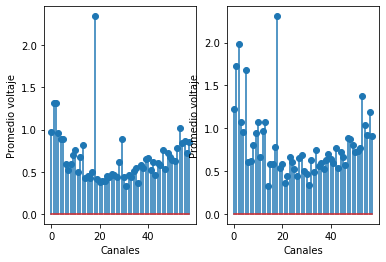

In [69]:
std_frecuentes = np.std(condicion_frecuente,1)
std_infrecuentes = np.std(condicion_infrecuente,1)
print(promedio_frecuentes.shape)

#valor promedio de voltaje en los canales respetando los ensayos
std_frecuentes = np.std(std_frecuentes,1)
std_infrecuentes = np.std(std_infrecuentes,1)
print(promedio_frecuentes.shape)

plt.subplot(1,2,1)
plt.stem(std_frecuentes)
plt.xlabel('Canales')
plt.ylabel('Promedio voltaje')
plt.subplot(1,2,2)
plt.stem(std_infrecuentes)
plt.xlabel('Canales')
plt.ylabel('Promedio voltaje')
plt.show()

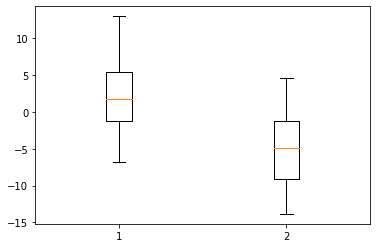

In [71]:
plt.boxplot((condicion_frecuente[9,:,0],condicion_infrecuente[9,:,0]))
plt.show()